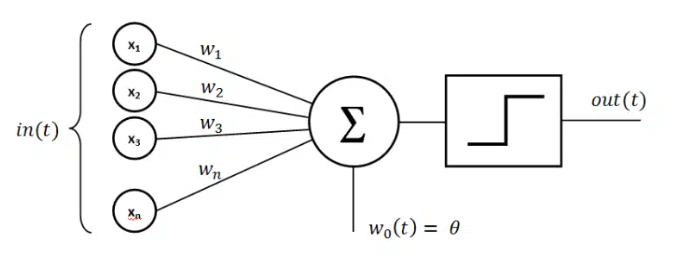

In [ ]:
# Je declare que ce code est de moi, et que je n'ai pas copié d'autres personnes.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

np.random.seed(42)  # Pour la reproductibilité

experience_years = np.random.randint(0, 15, size=100)  # Expérience entre 0 et 14 ans
projet = np.random.randint(0, 10, size=100)           # Nombre de projets entre 0 et 9

# Règle simple : embaucher si experience + projet > 12, sinon non
embaucher = np.where(experience_years + projet > 12, 1, -1)

dat = {
    'experience_years': experience_years.tolist(),
    'projet': projet.tolist(),
    'embaucher': embaucher.tolist()
}

# Affichage rapide des 10 premiers exemples
for i in range(10):
    print(f"Exp: {dat['experience_years'][i]}, Projet: {dat['projet'][i]}, Embaucher: {dat['embaucher'][i]}")


Exp: 6, Projet: 1, Embaucher: -1
Exp: 3, Projet: 9, Embaucher: -1
Exp: 12, Projet: 3, Embaucher: 1
Exp: 14, Projet: 7, Embaucher: 1
Exp: 10, Projet: 6, Embaucher: 1
Exp: 7, Projet: 8, Embaucher: 1
Exp: 12, Projet: 7, Embaucher: 1
Exp: 4, Projet: 4, Embaucher: -1
Exp: 6, Projet: 1, Embaucher: -1
Exp: 9, Projet: 4, Embaucher: 1


In [77]:
data=pd.DataFrame(dat)
data

,experience_years,projet,embaucher
0,6,1,-1
1,3,9,-1
2,12,3,1
3,14,7,1
4,10,6,1
...,...,...,...
95,12,7,1
96,14,5,1
97,1,7,-1
98,9,8,1


In [78]:
# Extraction feature and target variables
# x: features (experience_years, projet)
x=data[['experience_years', 'projet']].values
y=data['embaucher'].values

In [79]:
x.shape, y.reshape(-1, 1).shape

((100, 2), (100, 1))

In [ ]:
# Fonction somme pondérée z= w^T * x +b
def weighted_sum(x,weights,b):
    return ( np.dot(weights.T,x)+b )

# Activation function: f(z) = 1 if z >= 0 else -1
# f(z) = 1 si z > 0 sinon -1
def activation_function(z):
    return np.where(z > 0, 1, -1)

# Mise à jour des poids 
# w= w + learning_rate * y * x
# b= b + learning_rate * y
def update_weights(weights,b, x, y,epoch=5 ,learning_rate=0.1):
    for _ in range(epoch):
        for i in range(len(x)):
            z=weighted_sum(x[i], weights,b)
            y_pred=activation_function(z)
            if y_pred != y[i]:
                weights=weights + learning_rate * (y[i]-y_pred) * x[i]
                b=b + learning_rate * y[i]
    return weights, b
def predict(x, weights, b):
    z = weighted_sum(x, weights, b)
    y_pred = activation_function(z)
    if y_pred == 1:
        print(f"Pour une expérience de {x[0]} ans et {x[1]} projets, le candidat sera embauché.")
    else:
        print(f"Pour une expérience de {x[0]} ans et {x[1]} projets, le candidat ne sera pas embauché.")
    return y_pred

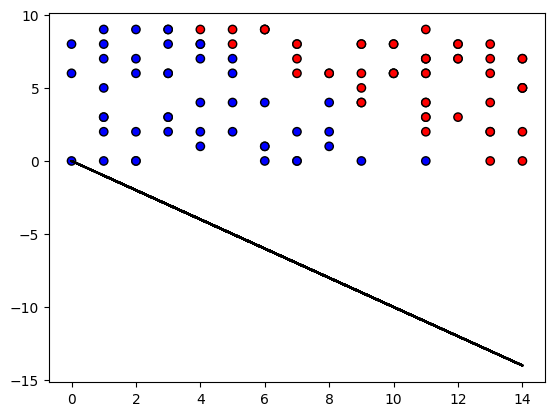

In [88]:
# initialization
weights = np.ones(x.shape[1])  # Initialize weights to zero
b = 0.0
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x[:, 0], (-weights[0] * x[:, 0] - b) / weights[1], color='black', label='Decision Boundary')
plt.show()

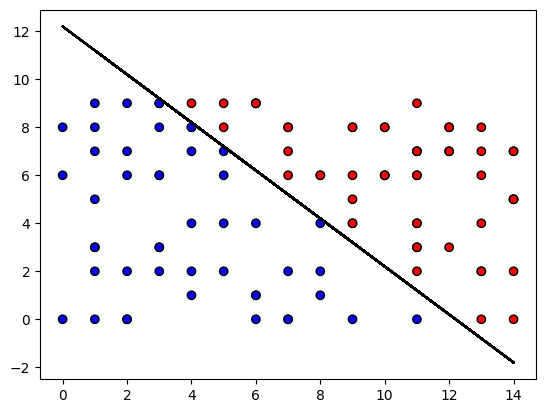

In [ ]:
# Training the perceptron
weights, b = update_weights(weights, b, x, y, epoch=500, learning_rate=0.1)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x[:, 0], (-weights[0] * x[:, 0] - b) / weights[1], color='black', label='Decision Boundary')
plt.show()

In [91]:
print(weights, b)

[1. 1.] -12.199999999999973


In [ ]:
x=[ 20, 50]
y_pred = predict(x, weights, b)


Pour une expérience de 20 ans et 50 projets, le candidat sera embauché.
